In [ ]:
# restart kernel before reinstall updated package
%pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ syng-bts==2.4

In [1]:
%load_ext autoreload
%autoreload 2

from syng_bts.python.Experiments_new import *
# from Experiments_new import *

In [ ]:
#%% run pilot experiments
# This function trains VAE or CVAE, or GAN, WGAN, WGANGP, MAF, GLOW, RealNVP 
#      with several pilot size given data, model, batch_size, learning_rate, epoch, off_aug and pre_model
#      for each pilot size, there will be 5 draws, 
#      for each draw, the data is augmented to 5 times the original sample size.
# dataname :         pure data name without .csv. Eg: SKCMPositive_3
# pilot_size:        a set including potential pilot sizes
# model:             name of the model to be trained
# batch_frac:        batch fraction
# learning_rate:     learning rate 
# epoch:             choose from None (early_stop), or any interger, if choose None, early_stop_num will take effect
# early_stop_num:    if loss does not improve for early_stop_num epochs, the training will stop. Default value is 30. Only take effect when epoch == "early_stop"
# off_aug:           choose from AE_head, Gaussian_head, None. if choose AE_head, AE_head_num will take effect. If choose Gaussian_head, Gaussian_head_num will take effect. If choose None, no offline augmentation
# AE_head_num:       how many folds of AEhead augmentation needed. Default value is 2, Only take effect when off_aug == "AE_head"
# Gaussian_head_num: how many folds of Gaussianhead augmentation needed. Default value is 9, Only take effect when off_aug == "Gaussian_head"
# pre_model:         transfer learning input model. If pre_model == None, no transfer learning

PilotExperiment(dataname = "SKCMPositive_4", pilot_size = [100],
                model = "VAE1-10", batch_frac = 0.1, 
                learning_rate = 0.0005, pre_model = None,
                epoch = None,  off_aug = None, early_stop_num = 30,
                AE_head_num = 2, Gaussian_head_num = 9)

1. Read data, path is ../Case/LIHCSubtype/LIHCSubtypeFamInd_train294_DESeq.csv
2. Determine the model is CVAE1-10 with kl-weight = 10
3. Determine the training parameters are epoch = early_stop off_aug = No learing rate = 0.0005 batch_frac = 0.1
3. Training starts ......
Epoch: 001/3000 | Batch 0000/0010 | Loss: 24161.5918
Epoch: 001/3000 | Batch 0001/0010 | Loss: 24003.9766
Epoch: 001/3000 | Batch 0002/0010 | Loss: 23966.6055
Epoch: 001/3000 | Batch 0003/0010 | Loss: 23636.4082
Epoch: 001/3000 | Batch 0004/0010 | Loss: 23488.6211
Epoch: 001/3000 | Batch 0005/0010 | Loss: 23645.2969
Epoch: 001/3000 | Batch 0006/0010 | Loss: 23160.1855
Epoch: 001/3000 | Batch 0007/0010 | Loss: 22776.1621
Epoch: 001/3000 | Batch 0008/0010 | Loss: 22893.6641
Epoch: 001/3000 | Batch 0009/0010 | Loss: 22583.4355
Time elapsed: 0.00 min
Epoch: 002/3000 | Batch 0000/0010 | Loss: 22392.1543
Epoch: 002/3000 | Batch 0001/0010 | Loss: 22279.0859
Epoch: 002/3000 | Batch 0002/0010 | Loss: 21938.9707
Epoch: 002/3000 

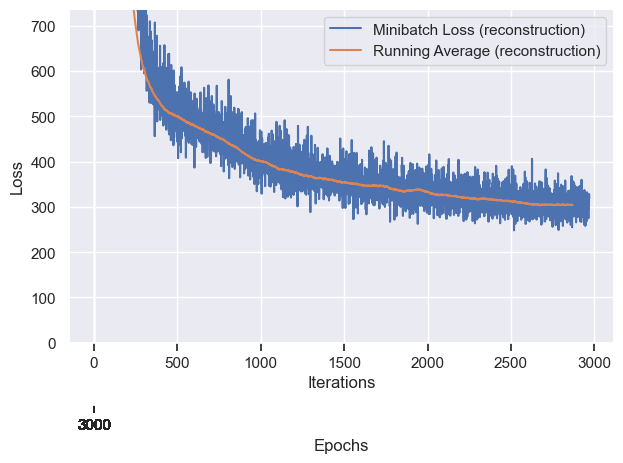

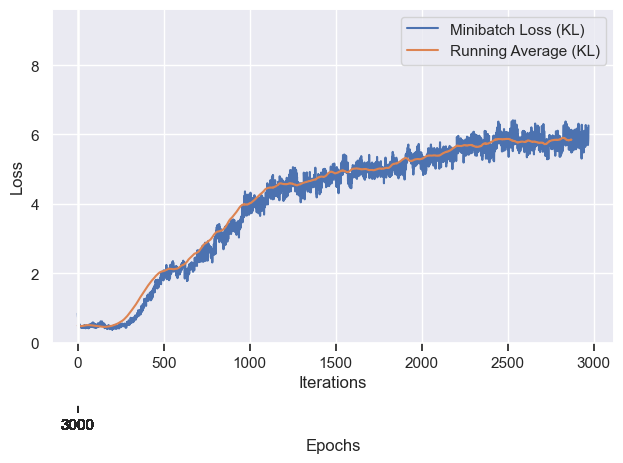

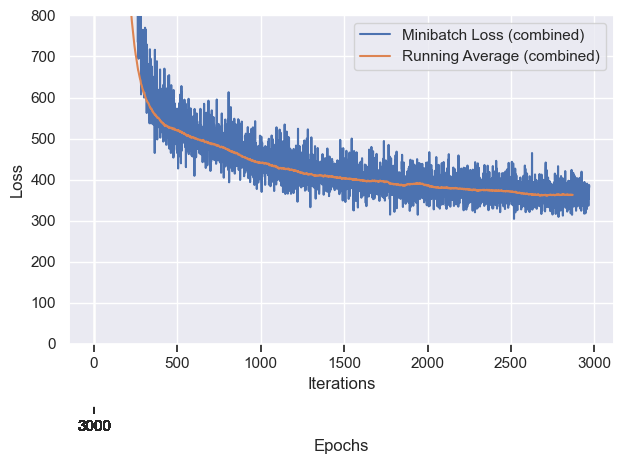

Directory created: ../Case/LIHCSubtype
VAEs model training finished.
Directory created: ../Case
Directory created: ../Case/LIHCSubtype


In [3]:
#%% running application on case study BRCASubtype
# This function trains VAE or CVAE, or GAN, WGAN, WGANGP, MAF, GLOW, RealNVP 
#      given data, model, batch_size, learning_rate, epoch, off_aug and pre_model
#      and generate new samples with size specified by the users.
# path:              path for reading real data and saving new data
# dataname :         pure data name without .csv. Eg: SKCMPositive_3
# apply_log:         logical whether apply log transformation before training
# model:             name of the model to be trained
# batch_frac:        batch fraction
# learning_rate:     learning rate 
# epoch:             choose from None (early_stop), or any interger, if choose None, early_stop_num will take effect
# early_stop_num:    if loss does not improve for early_stop_num epochs, the training will stop. Default value is 30. Only take effect when epoch == "early_stop"
# off_aug:           choose from AE_head, Gaussian_head, None. if choose AE_head, AE_head_num will take effect. If choose Gaussian_head, Gaussian_head_num will take effect. If choose None, no offline augmentation
# AE_head_num:       how many folds of AEhead augmentation needed. Default value is 2, Only take effect when off_aug == "AE_head"
# Gaussian_head_num: how many folds of Gaussianhead augmentation needed. Default value is 9, Only take effect when off_aug == "Gaussian_head"
# pre_model:         transfer learning input model. If pre_model == None, no transfer learning
# save_model:        if the trained model should be saved, specify the path and name of the saved model
        
ApplyExperiment(path = "../Case/LIHCSubtype/", dataname = "LIHCSubtypeFamInd_train294_DESeq", apply_log = True, 
                new_size = [1000], model = "CVAE1-10" , batch_frac = 0.1, 
                learning_rate = 0.0005, epoch = 3000, early_stop_num = 20, 
                off_aug = None, AE_head_num = 2, Gaussian_head_num = 9, 
                pre_model = None, save_model = None)

In [ ]:
#%% Running transfer learning
# This function run transfer learning using VAE or CVAE, or GAN, WGAN, WGANGP, MAF, GLOW, RealNVP 
#      given fromdata, todata, model, batch_size, learning_rate, epoch, off_aug and pre_model
#      and generate new samples with size specified by the users.
#      The fine tuning model training can be pilot experiments or apply experiment
# Make sure data files for pre_model training and fine tuning model training are in Transfer/
# pilot_size:        if None, the fine tuning model will be apply experiment and new_size will take effect
#                    otherwise, the fine tuning model will be trained using pilot experiments
# fromname:          the dataname for pre_model training 
# toname:            the dataname for fine tuning model training
# fromsize:          the sample size of the fromdata
# new_size:          if apply experiment, this will be the sample size of generated samples
# apply_log:         logical whether apply log transformation before training
# model:             name of the model to be trained
# batch_frac:        batch fraction
# learning_rate:     learning rate 
# epoch:             choose from None (early_stop), or any interger, if choose None, early_stop_num will take effect
# off_aug:           choose from AE_head, Gaussian_head, None. if choose AE_head, AE_head_num will take effect. If choose Gaussian_head, Gaussian_head_num will take effect. If choose None, no offline augmentation
TransferExperiment(pilot_size = None, fromname = "PRAD", toname = "BRCA", fromsize = 551, 
         new_size = 500, apply_log = True, model = "maf", epoch = 10,
         batch_frac = 0.1, learning_rate = 0.0005, off_aug = None)